<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-4-Sprint-1-NLP/blob/main/module4-topic-modeling/LS_DS17_414_Topic_Modeling_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling (Prepare)
Learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

In [1]:
import numpy as np

"""
Gensim is an open-source library for unsupervised topic modeling and natural 
language processing, using modern statistical machine learning. Gensim is 
implemented in Python and Cython.
"""
import gensim
import os
import re

"""
literal_eval: Safely evaluate an expression node or a string containing a 
Python literal or container display. The string or node provided may only 
consist of the following Python literal structures: strings, bytes, numbers, 
tuples, lists, dicts, sets, booleans, and None.
"""
# The ast module helps Python applications to process trees of the Python abstract syntax grammar.
from ast import literal_eval

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
import tqdm

In [10]:
df = pd.read_csv('./data/imbd_keywords.csv')

In [11]:
df.head()

,review,sentiment,keywords
0,One of the other reviewers has mentioned that ...,positive,"['other shows', 'graphic violence', 'prison ex..."
1,A wonderful little production. The filming tec...,positive,"['halliwell', 'michael sheen', 'realism', 'com..."
2,I thought this was a wonderful way to spend ti...,positive,"['spirited young woman', 'devil wears prada', ..."
3,Basically there's a family where a little boy ...,negative,"['playing parents', 'jake', 'parents', 'descen..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"['mr. mattei', 'good luck', 'mattei', 'human r..."


In [12]:
df.shape

(40436, 3)

In [13]:
df['keywords'][0]

"['other shows', 'graphic violence', 'prison experience', 'prison bitches', 'violence', 'emerald city', 'dodgy dealings', 'glass fronts', 'inmates', 'street skills', 'unflinching scenes', 'crooked guards', 'the oswald maximum security state penitentary', 'mainstream audiences', 'oz', 'city', 'shady agreements', 'pretty pictures', 'touch', 'muslims', 'irish', 'italians', 'gangstas', 'latinos', 'christians', 'home', 'first', 'charm', 'the high levels', 'drugs', 'right', 'regards', 'well mannered, middle class inmates', 'sex', 'a show', 'scuffles', 'order', 'aryans', 'just 1 oz episode', 'the first episode', 'the other reviewers', 'your darker side', 'the prison', 'the main appeal', 'romance', 'the first thing', 'an experimental section', 'privacy', 'the classic use', 'the word', 'no punches', 'its brutality', 'their lack', 'a taste', 'the fact', 'the nickname', 'the agenda', 'all the cells', 'a nickel', 'you']"

In [16]:
type(df['keywords'][0])

str

In [17]:
type(literal_eval(df['keywords'][0]))

list

In [18]:
# revert the string of list to original list
df['keywords'] = df['keywords'].apply(literal_eval)

In [19]:
df['keywords'][0]

['other shows',
 'graphic violence',
 'prison experience',
 'prison bitches',
 'violence',
 'emerald city',
 'dodgy dealings',
 'glass fronts',
 'inmates',
 'street skills',
 'unflinching scenes',
 'crooked guards',
 'the oswald maximum security state penitentary',
 'mainstream audiences',
 'oz',
 'city',
 'shady agreements',
 'pretty pictures',
 'touch',
 'muslims',
 'irish',
 'italians',
 'gangstas',
 'latinos',
 'christians',
 'home',
 'first',
 'charm',
 'the high levels',
 'drugs',
 'right',
 'regards',
 'well mannered, middle class inmates',
 'sex',
 'a show',
 'scuffles',
 'order',
 'aryans',
 'just 1 oz episode',
 'the first episode',
 'the other reviewers',
 'your darker side',
 'the prison',
 'the main appeal',
 'romance',
 'the first thing',
 'an experimental section',
 'privacy',
 'the classic use',
 'the word',
 'no punches',
 'its brutality',
 'their lack',
 'a taste',
 'the fact',
 'the nickname',
 'the agenda',
 'all the cells',
 'a nickel',
 'you']

In [20]:
df.head()

,review,sentiment,keywords
0,One of the other reviewers has mentioned that ...,positive,"[other shows, graphic violence, prison experie..."
1,A wonderful little production. The filming tec...,positive,"[halliwell, michael sheen, realism, comedy, wi..."
2,I thought this was a wonderful way to spend ti...,positive,"[spirited young woman, devil wears prada, summ..."
3,Basically there's a family where a little boy ...,negative,"[playing parents, jake, parents, descent dialo..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[mr. mattei, good luck, mattei, human relation..."


In [21]:
stop_words = [
    'movie',
    'review',
    'film', 
    'actor',
    'actress',
    'films',
]

import spacy
nlp = spacy.load('en_core_web_lg')

In [24]:
stops = nlp.Defaults.stop_words.union(stop_words)
len(stops)

332

In [30]:
def remove_stops(_list_):
    """
    Remove stop words from every string in a list of strings. 
    Each string may contain multiple words 
    _list_ refers to each row in dataframe
    """
    
    keywords = []
    
    # keyword is a string phrase containing multiple words
    for keyword in _list_:
        
        phrase = []
        
        words = keyword.split()
        
        for word in words:
            if word in stops:
                pass
            else: 
                phrase.append(word)
            
        # join elements of phrase with ' 's
        phrase = ' '.join(phrase)
        
        # to exclude blanks,i.e. phrase = ""
        if len(phrase) > 0:
            keywords.append(phrase)
    # keywords is a processed version of _list_
    return keywords
    

In [34]:
# tqdm.tqdm
from tqdm import tqdm
# tqdm has a delayer adapter, so it's necessary to instanciate it before accessing its methods
tqdm.pandas()
# Adds progress_apply() to pd.Series methods
df['clean_keywords'] = df['keywords'].progress_apply(remove_stops)

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/tqdm/std.py:702: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 40436/40436 [00:01<00:00, 25196.77it/s]


In [57]:
print(pd.options.display.max_colwidth)
pd.options.display.max_colwidth = 100

50


In [58]:
df[["keywords", 'clean_keywords']].iloc[0]

keywords          [other shows, graphic violence, prison experience, prison bitches, violence, emerald city, dodgy...
clean_keywords    [shows, graphic violence, prison experience, prison bitches, violence, emerald city, dodgy deali...
Name: 0, dtype: object

In [59]:
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [112]:
# Dict representation of all our keywords from the entire df column
# assign an id to each keyword string in alphabetical order
id2word = corpora.Dictionary(df['clean_keywords'])

In [113]:
[id2word[i] for i in range(0,11)]

['1 oz episode',
 'agenda',
 'aryans',
 'brutality',
 'cells',
 'charm',
 'christians',
 'city',
 'classic use',
 'crooked guards',
 'darker']

In [114]:
len(df['clean_keywords'][0]), len(df['clean_keywords'])

(57, 40436)

In [115]:
len(id2word), len(set(id2word.keys()))

(491029, 491029)

In [116]:
id2word.token2id['agenda']

1

In [117]:
[m for m in dir(id2word) if not m.startswith("_")]

['add_documents',
 'cfs',
 'compactify',
 'dfs',
 'doc2bow',
 'doc2idx',
 'filter_extremes',
 'filter_n_most_frequent',
 'filter_tokens',
 'from_corpus',
 'from_documents',
 'get',
 'id2token',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'load',
 'load_from_text',
 'merge_with',
 'num_docs',
 'num_nnz',
 'num_pos',
 'patch_with_special_tokens',
 'save',
 'save_as_text',
 'token2id',
 'values']

In [118]:
# exclude the keys that are repeated less than or more than a certain number of times
id2word.filter_extremes(no_below=15, no_above=0.85)

In [119]:
len(id2word.keys())

10064

In [120]:
# token "1 oz episode" is removed, and ids are re-assigned
id2word[0]

'agenda'

* **.doc2bow() method** Allows us to convert any random document to a bag of word based on a dictionary of id2word that we have built. token_ids are used from the dictionary and words that are not in the dictionary are ignored.

In [125]:
# 'aryans' is no longer in the id2word dict
id2word.doc2bow(['agenda', 'agenda', 'city', 'aryans'])

[(0, 2), (5, 1)]

In [126]:
id2word.doc2bow(df['clean_keywords'][0])

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1)]

### Bag of words _Counting_
`corpus` is counter type bow with one row for each document.

In [127]:
"""
counts number of occurences of each token (must exist in dictionary of id2word) **per document**, 
(token_id, count)
"""
corpus = [id2word.doc2bow(text) for text in df['clean_keywords']]

In [128]:
# token_id = 9 is counted once in doc0 and doc500
corpus[0:600:500]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(9, 1),
  (87, 1),
  (92, 1),
  (118, 1),
  (148, 1),
  (177, 1),
  (251, 1),
  (402, 1),
  (412, 1),
  (601, 1),
  (670, 1),
  (1090, 1),
  (1937, 1),
  (2191, 1),
  (3397, 1),
  (4231, 1),
  (4232, 1),
  (4233, 1),
  (4234, 1),
  (4235, 1),
  (4236, 1)]]

In [129]:
# same length as the df['clean_keywords']
len(corpus)

40436

### Topic Modeling
### Parallelized Latent Dirichlet Allocation

The constructor estimates Latent Dirichlet Allocation model parameters based on a training corpus:
```
lda = LdaMulticore(corpus, num_topics=10)
```
You can then infer topic distributions on new, unseen documents, with
```
doc_lda = lda[doc_bow]
```
The model can be updated (trained) with new documents via
```
lda.update(other_corpus)
```
Model persistency is achieved through its load/save methods.

In [130]:
lda = LdaMulticore(corpus=corpus, # doc_bow
                   id2word=id2word,  # dictionary
                   num_topics=20,
                   passes=50, 
                   workers=7
                  )

In [131]:
[m for m in dir(lda) if not m.startswith("_")]

['alpha',
 'batch',
 'bound',
 'callbacks',
 'chunksize',
 'clear',
 'decay',
 'diff',
 'dispatcher',
 'distributed',
 'do_estep',
 'do_mstep',
 'dtype',
 'eta',
 'eval_every',
 'expElogbeta',
 'gamma_threshold',
 'get_document_topics',
 'get_term_topics',
 'get_topic_terms',
 'get_topics',
 'id2word',
 'inference',
 'init_dir_prior',
 'iterations',
 'load',
 'log_perplexity',
 'minimum_phi_value',
 'minimum_probability',
 'num_terms',
 'num_topics',
 'num_updates',
 'numworkers',
 'offset',
 'optimize_alpha',
 'optimize_eta',
 'passes',
 'per_word_topics',
 'print_topic',
 'print_topics',
 'random_state',
 'save',
 'show_topic',
 'show_topics',
 'state',
 'sync_state',
 'top_topics',
 'update',
 'update_alpha',
 'update_eta',
 'update_every',
 'workers']

In [137]:
id2word.token2id["acting"]

81

In [132]:
# topics represented as weighted tokens
lda.print_topics()

[(0,
  '0.026*"acting" + 0.021*"time" + 0.020*"people" + 0.020*"plot" + 0.016*"actors" + 0.015*"money" + 0.013*"movies" + 0.013*"script" + 0.013*"story" + 0.012*"characters"'),
 (1,
  '0.020*"book" + 0.018*"story" + 0.011*"novel" + 0.010*"characters" + 0.008*"actors" + 0.007*"love" + 0.007*"version" + 0.007*"dvd" + 0.007*"time" + 0.007*"vote"'),
 (2,
  '0.018*"story" + 0.012*"movies" + 0.011*"characters" + 0.010*"actors" + 0.008*"australian" + 0.008*"lot" + 0.008*"cast" + 0.008*"great" + 0.007*"time" + 0.007*"indian"'),
 (3,
  '0.010*"oscar" + 0.006*"screen" + 0.006*"man" + 0.006*"hollywood" + 0.006*"time" + 0.006*"american" + 0.005*"role" + 0.005*"second" + 0.005*"broadway" + 0.005*"mgm"'),
 (4,
  '0.013*"night" + 0.011*"time" + 0.009*"guy" + 0.009*"house" + 0.008*"people" + 0.007*"end" + 0.007*"scene" + 0.007*"second" + 0.006*"plot" + 0.005*"things"'),
 (5,
  '0.017*"family" + 0.016*"mother" + 0.015*"father" + 0.014*"life" + 0.012*"son" + 0.011*"people" + 0.010*"wife" + 0.010*"love" 

In [142]:
# Print two random topics
lda.print_topics(2, num_words=4)

[(18, '0.017*"life" + 0.015*"story" + 0.012*"love" + 0.010*"characters"'),
 (15, '0.023*"story" + 0.014*"characters" + 0.012*"people" + 0.011*"end"')]

In [143]:
import re

In [147]:
test = lda.print_topics(1)
test

[(5,
  '0.017*"family" + 0.016*"mother" + 0.015*"father" + 0.014*"life" + 0.012*"son" + 0.011*"people" + 0.010*"wife" + 0.010*"love" + 0.009*"daughter" + 0.009*"end"')]

In [148]:
# list(tuple)
test[0][1]

'0.017*"family" + 0.016*"mother" + 0.015*"father" + 0.014*"life" + 0.012*"son" + 0.011*"people" + 0.010*"wife" + 0.010*"love" + 0.009*"daughter" + 0.009*"end"'

In [149]:
# re.findall() returns a list of all the matching patterns
re.findall(r'"[^"]*"', test[0][1])

['"family"',
 '"mother"',
 '"father"',
 '"life"',
 '"son"',
 '"people"',
 '"wife"',
 '"love"',
 '"daughter"',
 '"end"']

In [150]:
# t[1] exclude the topic number from each tuple
# r'"[^"]*"' grab every instance of the patterns between " and "

words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]

In [151]:
words[0]

['"acting"',
 '"time"',
 '"people"',
 '"plot"',
 '"actors"',
 '"money"',
 '"movies"',
 '"script"',
 '"story"',
 '"characters"']

In [152]:
# number of topics
len(words)

20

In [153]:
# t refers to each of 20 topics, grab the first 5 keywords in each topic
topic_labels = [', '.join(t[0:5]) for t in words]

In [154]:
for id, t in enumerate(topic_labels): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
"acting", "time", "people", "plot", "actors"

------ Topic 1 ------
"book", "story", "novel", "characters", "actors"

------ Topic 2 ------
"story", "movies", "characters", "actors", "australian"

------ Topic 3 ------
"oscar", "screen", "man", "hollywood", "time"

------ Topic 4 ------
"night", "time", "guy", "house", "people"

------ Topic 5 ------
"family", "mother", "father", "life", "son"

------ Topic 6 ------
"dvd", "time", "way", "people", "copy"

------ Topic 7 ------
"people", "time", "story", "fact", "things"

------ Topic 8 ------
"action", "time", "plot", "cast", "director"

------ Topic 9 ------
"people", "episode", "series", "episodes", "characters"

------ Topic 10 ------
"time", "man", "thing", "way", "point"

------ Topic 11 ------
"murder", "police", "crime", "man", "way"

------ Topic 12 ------
"time", "people", "lot", "fun", "course"

------ Topic 13 ------
"american", "war", "german", "time", "people"

------ Topic 14 ------
"movies", "hollyw

In [159]:
import pyLDAvis

pyLDAvis.enable_notebook()

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [160]:
[m for m in dir() if m.startswith("pyLDA")]

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pyLDAvis']

* To prevent the notebook styling be overwritten by pyLDAvis, we can save the graph to html and open is in another tab.
```
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus, dictionary=lda_model_tfidf.id2word)
pyLDAvis.save_html(vis, "/........./Desktop/top_5_topicsb.html")
```

In [161]:
#Lambda 0 shows the unique representative keywords of a topic
# Lambda=1 shows the most probable keyword showing in a topic
pyLDAvis.gensim.prepare(topic_model=lda, corpus=corpus, dictionary=id2word)

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.075351  0.063594       1        1  10.102042
18     0.083054 -0.127906       2        1   8.546644
7     -0.062261 -0.093996       3        1   6.553606
5     -0.060918 -0.089953       4        1   6.074247
13     0.104943 -0.190349       5        1   5.860523
9     -0.059205 -0.052004       6        1   5.857488
16    -0.120405  0.028615       7        1   5.304918
11    -0.041437 -0.126859       8        1   5.164299
4     -0.217567  0.034207       9        1   4.593516
8      0.056301  0.044091      10        1   4.518222
19     0.117015  0.083159      11        1   4.500062
6     -0.014255  0.049309      12        1   4.356006
15     0.064681 -0.050387      13        1   4.271914
12    -0.153239  0.044103      14        1   3.980559
2      0.146295  0.071340      15        1   3.751071
3      0.121938  0.082474      16        1   3.589199
10    -0.027902 -0.057866      17        1   3.537758
1      0.122341  0.016593      18        1   3.453744
17    -0.005152  0.181244      19        1   3.349409
14     0.021125  0.090588      20        1   2.634774, topic_info=        Term         Freq        Total Category  logprob  loglift
173   horror  1377.000000  1377.000000  Default  30.0000  30.0000
1115    gore  1123.000000  1123.000000  Default  29.0000  29.0000
114     kids  1525.000000  1525.000000  Default  28.0000  28.0000
81    acting  4276.000000  4276.000000  Default  27.0000  27.0000
420      war   986.000000   986.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
90     money    78.194522  2563.831878  Topic20  -5.7067   0.1463
129    today    69.716462  1605.356032  Topic20  -5.8215   0.4997
210     cast    71.285547  2260.044466  Topic20  -5.7992   0.1799
709      guy    68.211356  1860.884976  Topic20  -5.8433   0.3302
97      rest    68.639667  2379.513422  Topic20  -5.8370   0.0906

[1642 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
6786      3  0.950860  "special effects
3766     15  0.930393                 1
7544     14  0.952104            1 star
9002      3  0.035397        10 seconds
9002      9  0.920317        10 seconds
...     ...       ...               ...
3920      6  0.955164              zoey
2886      3  0.065378           zombies
2886      7  0.272409           zombies
2886      9  0.196135           zombies
2886     14  0.464912           zombies

[5695 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 19, 8, 6, 14, 10, 17, 12, 5, 9, 20, 7, 16, 13, 3, 4, 11, 2, 18, 15])

### Estimated percentage of topics that exist in each document


In [162]:
# estimated percentage of topics that exist in each document
lda[corpus[0]]

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(9, 0.5408864), (10, 0.1450507), (11, 0.29043266)]

In [163]:
distro = [lda[doc] for doc in corpus]

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
distro[0]

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(9, 0.54091704), (10, 0.14506154), (11, 0.29039124)]

Standardizing the length of distribution variable

In [165]:
def update(doc):
    """
    d_dist.keys: topic
    d_dist[topic]: percentage of a doc filled with the topic
    """
    # fills all the irrelevant topic keys for a doc with 0 distribution probability
    d_dist = {k:0 for k in range(0,20)}
    for t in doc:
        #update topic # t[0] key with t[1] value
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro] 

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [167]:
# topic distribution for doc0 and doc1
new_distro[:2]

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0.54091704,
  10: 0.14506154,
  11: 0.29039124,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0},
 {0: 0,
  1: 0.10310074,
  2: 0,
  3: 0.2997028,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0.12649219,
  18: 0.42857662,
  19: 0}]

In [168]:
# .from_records Creates a DataFrame object from a structured ndarray, sequence of tuples or dicts, or DataFrame
# Keys are the column labels
topics = pd.DataFrame.from_records(new_distro)
topics.head()

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.540917,0.145062,0.290391,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.103101,0.0,0.299703,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.126492,0.428577,0.0
2,0.000000,0.253354,0.0,0.000000,0.197987,0.000000,0.000000,0.0,0.383772,0.000000,0.000000,0.000000,0.0,0.117812,0.0,0.00000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.594243,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.336475,0.000000,0.000000,0.0
4,0.109998,0.000000,0.0,0.000000,0.000000,0.000000,0.088767,0.0,0.197666,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.34007,0.000000,0.000000,0.238486,0.0


In [169]:
topics.columns = topic_labels
print(topics.shape)
topics.head()

(40436, 20)


/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"""acting"", ""time"", ""people"", ""plot"", ""actors""","""book"", ""story"", ""novel"", ""characters"", ""actors""","""story"", ""movies"", ""characters"", ""actors"", ""australian""","""oscar"", ""screen"", ""man"", ""hollywood"", ""time""","""night"", ""time"", ""guy"", ""house"", ""people""","""family"", ""mother"", ""father"", ""life"", ""son""","""dvd"", ""time"", ""way"", ""people"", ""copy""","""people"", ""time"", ""story"", ""fact"", ""things""","""action"", ""time"", ""plot"", ""cast"", ""director""","""people"", ""episode"", ""series"", ""episodes"", ""characters""","""time"", ""man"", ""thing"", ""way"", ""point""","""murder"", ""police"", ""crime"", ""man"", ""way""","""time"", ""people"", ""lot"", ""fun"", ""course""","""american"", ""war"", ""german"", ""time"", ""people""","""movies"", ""hollywood"", ""time"", ""edge"", ""seat""","""story"", ""characters"", ""people"", ""end"", ""time""","""horror"", ""gore"", ""blood"", ""acting"", ""story""","""kids"", ""disney"", ""children"", ""animation"", ""story""","""life"", ""story"", ""love"", ""characters"", ""time""","""time"", ""music"", ""story"", ""role"", ""love"""
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.540917,0.145062,0.290391,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.103101,0.0,0.299703,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.126492,0.428577,0.0
2,0.000000,0.253354,0.0,0.000000,0.197987,0.000000,0.000000,0.0,0.383772,0.000000,0.000000,0.000000,0.0,0.117812,0.0,0.00000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.594243,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.336475,0.000000,0.000000,0.0
4,0.109998,0.000000,0.0,0.000000,0.000000,0.000000,0.088767,0.0,0.197666,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.34007,0.000000,0.000000,0.238486,0.0


In [170]:
# find the index on axis=1 where the value in the row is max
df['primary_topic'] = topics.idxmax(axis=1)

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
df.head()

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,sentiment,keywords,clean_keywords,primary_topic
0,One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked....,positive,"[other shows, graphic violence, prison experience, prison bitches, violence, emerald city, dodgy...","[shows, graphic violence, prison experience, prison bitches, violence, emerald city, dodgy deali...","""people"", ""episode"", ""series"", ""episodes"", ""characters"""
1,A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashi...,positive,"[halliwell, michael sheen, realism, comedy, williams, piece, bbc, orton, a wonderful little prod...","[halliwell, michael sheen, realism, comedy, williams, piece, bbc, orton, wonderful little produc...","""life"", ""story"", ""love"", ""characters"", ""time"""
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...",positive,"[spirited young woman, devil wears prada, summer weekend, match point, scarlet johanson, woody a...","[spirited young woman, devil wears prada, summer weekend, match point, scarlet johanson, woody a...","""action"", ""time"", ""plot"", ""cast"", ""director"""
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his...,negative,"[playing parents, jake, parents, descent dialogs, real life, a boogeyman similar movie, rambo, s...","[playing parents, jake, parents, descent dialogs, real life, boogeyman similar, rambo, meaningle...","""family"", ""mother"", ""father"", ""life"", ""son"""
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei off...",positive,"[mr. mattei, good luck, mattei, human relations, people, rosario dawson, michael imperioli, caro...","[mr. mattei, good luck, mattei, human relations, people, rosario dawson, michael imperioli, caro...","""story"", ""characters"", ""people"", ""end"", ""time"""


In [172]:
df['primary_topic'].value_counts()

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"acting", "time", "people", "plot", "actors"               6520
"life", "story", "love", "characters", "time"              3633
"people", "episode", "series", "episodes", "characters"    2642
"people", "time", "story", "fact", "things"                2501
"horror", "gore", "blood", "acting", "story"               2261
"family", "mother", "father", "life", "son"                2182
"time", "music", "story", "role", "love"                   1970
"american", "war", "german", "time", "people"              1929
"action", "time", "plot", "cast", "director"               1784
"night", "time", "guy", "house", "people"                  1731
"story", "characters", "people", "end", "time"             1645
"dvd", "time", "way", "people", "copy"                     1633
"murder", "police", "crime", "man", "way"                  1560
"time", "people", "lot", "fun", "course"                   1516
"story", "movies", "characters", "actors", "australian"    1505
"kids", "disney", "children", "animation

In [180]:
# Count number of reviews for each primary_topic that are labeled negative and positive
# ['review'] could change to other available column labels too without changing the results
agg = pd.pivot_table(data=df, values=['review'], 
                     index=['primary_topic'], 
                     columns=['sentiment'], aggfunc='count')

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [181]:
agg

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


review         
sentiment                                               negative positive
primary_topic                                                            
"acting", "time", "people", "plot", "actors"                5413     1107
"action", "time", "plot", "cast", "director"                 970      814
"american", "war", "german", "time", "people"                691     1238
"book", "story", "novel", "characters", "actors"             536      720
"dvd", "time", "way", "people", "copy"                       751      882
"family", "mother", "father", "life", "son"                  892     1290
"horror", "gore", "blood", "acting", "story"                1310      951
"kids", "disney", "children", "animation", "story"           515      826
"life", "story", "love", "characters", "time"               1069     2564
"movies", "hollywood", "time", "edge", "seat"                335      390
"murder", "police", "crime", "man", "way"                    720      840
"night", "time", "guy", "house", "people"                   1153      578
"oscar", "screen", "man", "hollywood", "time"                368      771
"people", "episode", "series", "episodes", "characters"     1250     1392
"people", "time", "story", "fact", "things"                 1380     1121
"story", "characters", "people", "end", "time"               551     1094
"story", "movies", "characters", "actors", "australian"      437     1068
"time", "man", "thing", "way", "point"                       485      478
"time", "music", "story", "role", "love"                     468     1502
"time", "people", "lot", "fun", "course"                     920      596

In [182]:
agg.columns, agg.index

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(MultiIndex([('review', 'negative'),
             ('review', 'positive')],
            names=[None, 'sentiment']),
 Index(['"acting", "time", "people", "plot", "actors"',
        '"action", "time", "plot", "cast", "director"',
        '"american", "war", "german", "time", "people"',
        '"book", "story", "novel", "characters", "actors"',
        '"dvd", "time", "way", "people", "copy"',
        '"family", "mother", "father", "life", "son"',
        '"horror", "gore", "blood", "acting", "story"',
        '"kids", "disney", "children", "animation", "story"',
        '"life", "story", "love", "characters", "time"',
        '"movies", "hollywood", "time", "edge", "seat"',
        '"murder", "police", "crime", "man", "way"',
        '"night", "time", "guy", "house", "people"',
        '"oscar", "screen", "man", "hollywood", "time"',
        '"people", "episode", "series", "episodes", "characters"',
        '"people", "time", "story", "fact", "things"',
        '"story", "characters", "p

In [183]:
agg = agg.reset_index()

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
agg.head()

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


primary_topic   review         
sentiment                                                   negative positive
0              "acting", "time", "people", "plot", "actors"     5413     1107
1              "action", "time", "plot", "cast", "director"      970      814
2             "american", "war", "german", "time", "people"      691     1238
3          "book", "story", "novel", "characters", "actors"      536      720
4                    "dvd", "time", "way", "people", "copy"      751      882

In [186]:
agg.columns, agg.index

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(MultiIndex([('primary_topic',         ''),
             (       'review', 'negative'),
             (       'review', 'positive')],
            names=[None, 'sentiment']),
 RangeIndex(start=0, stop=20, step=1))

In [197]:
type(agg.columns[1])

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tuple

In [198]:
agg.columns = ['primary_topic', 'negative', 'positive']
agg.head(2)

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,primary_topic,negative,positive
0,"""acting"", ""time"", ""people"", ""plot"", ""actors""",5413,1107
1,"""action"", ""time"", ""plot"", ""cast"", ""director""",970,814


/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/seaborn/categorical.py:339: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/seaborn/categorical.py:339: DeprecationWarni

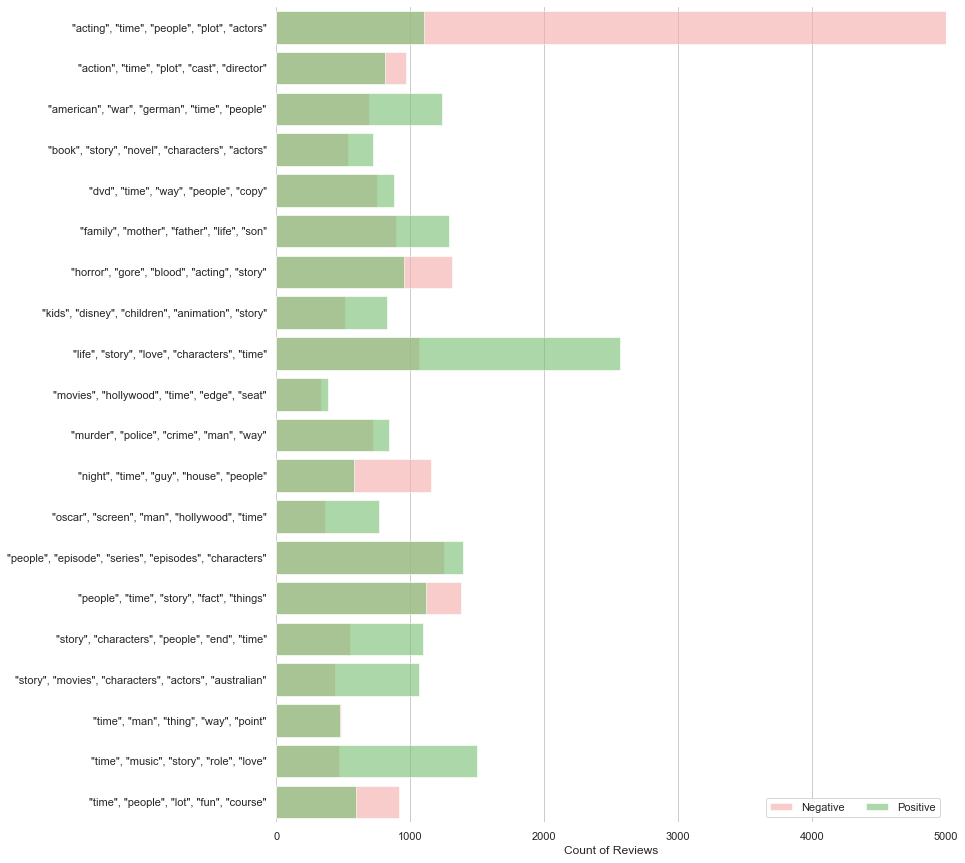

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 15))

sns.set_color_codes('pastel')
sns.barplot(x='negative', y='primary_topic', data=agg, label="Negative", color="r", alpha=0.6)

sns.set_color_codes('muted')
sns.barplot(x='positive', y='primary_topic', data=agg, label="Positive", color="g", alpha=0.6)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,5000), ylabel="", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)